**House Prices: Advanced Regression Techniques**

***Import Libraries***

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

***Read Train and Test Data***

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

***Check Dimension of our Dataset***

In [7]:
print ("Train data shape:" ,train.shape)
print ("Test data shape :" ,test.shape)

Train data shape: (1460, 81)
Test data shape : (1459, 80)


***Check few rows of Train dataset***

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
plt.style.use(style = "fivethirtyeight")
plt.rcParams['figure.figsize'] = (10,6)

***Exploring the Dataset and Engineering Features***

In [10]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

***Check Skewness***

Skew is : 1.88287575977


(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

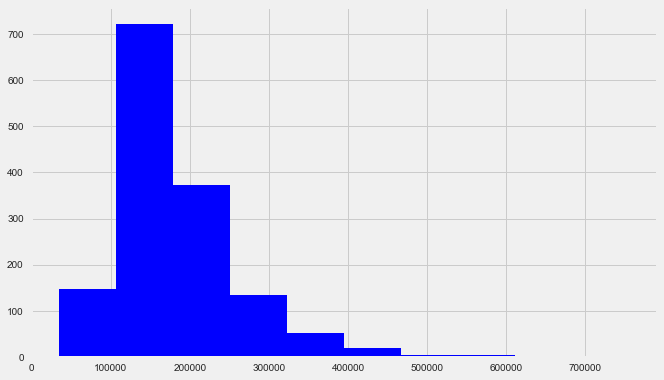

In [12]:
print ("Skew is :" , train.SalePrice.skew())
plt.hist(train.SalePrice, color = 'blue')

***Use Log Transformation to remove Skewness***

Skew is : 0.121335062205


(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

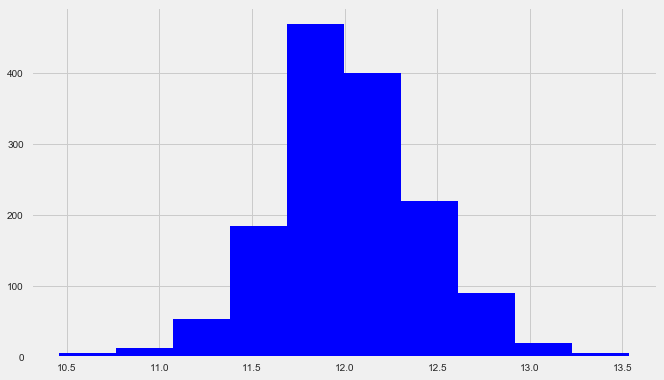

In [13]:
target = np.log(train.SalePrice)
print ("Skew is :" , target.skew())
plt.hist(target, color = 'blue')

***Working with Numeric Features***

In [14]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

***Finding Correlation between Target and Variables***

In [16]:
corr = numeric_features.corr()
print ("Top 5 Posively Correlated Features\n\n",corr['SalePrice'].sort_values(ascending = False)[:5],'\n')
print ("Top 5 Negatively Correlated Features\n\n" , (corr['SalePrice'].sort_values(ascending = False)[-5:]))

Top 5 Posively Correlated Features

 SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

Top 5 Negatively Correlated Features

 YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


***Let's Explore OverallQual Feature***

In [17]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

***Create Pivot Table***

In [18]:
quality_pivot = train.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

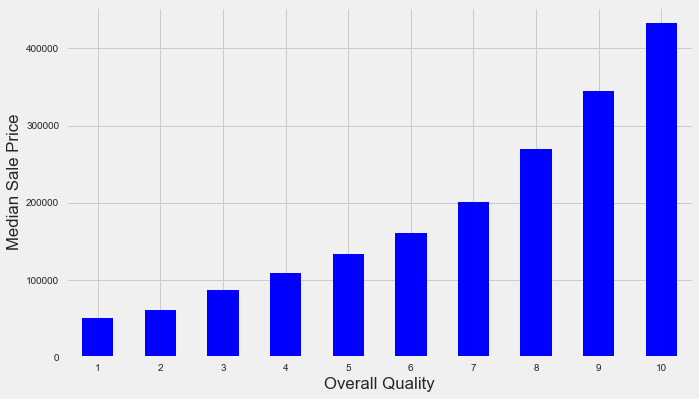

In [19]:
quality_pivot.plot(kind = 'bar', color = 'blue')
plt.ylabel("Median Sale Price")
plt.xlabel("Overall Quality")
plt.xticks(rotation = 0)

***Exploring Ground Living Area relationship with Saleprice***

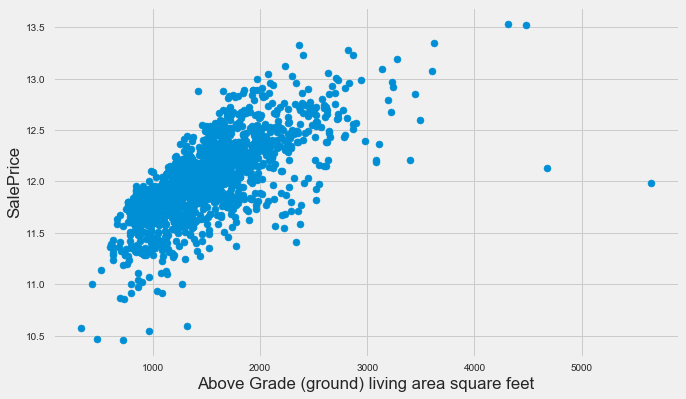

In [20]:
plt.scatter(x = train.GrLivArea, y = target)
plt.xlabel('Above Grade (ground) living area square feet')
plt.ylabel('SalePrice')

***Exploring Garage Area with Saleprice***

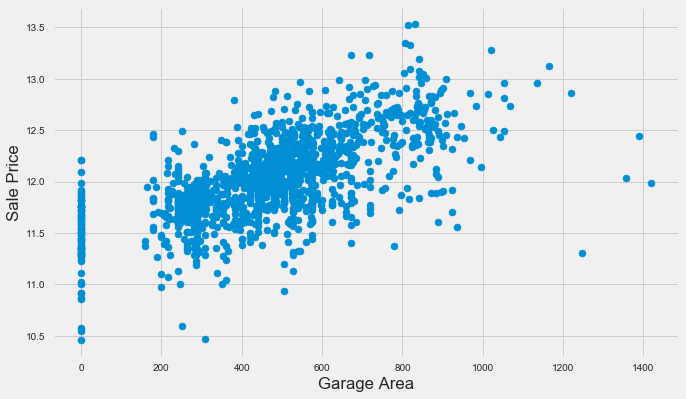

In [21]:
plt.scatter(x = train.GarageArea, y = target)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")

***Removing Outliers***

In [22]:
train = train[train['GarageArea'] < 1200]

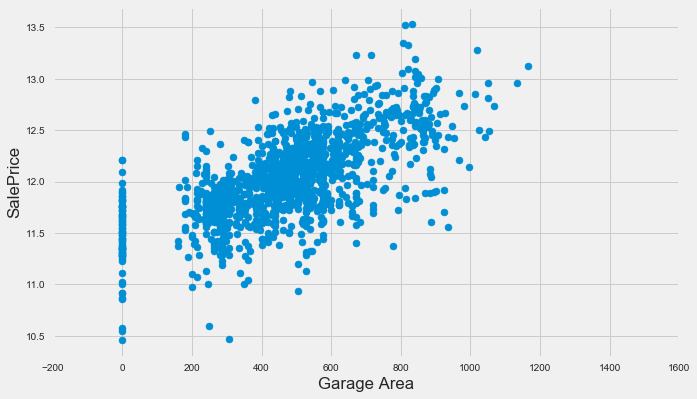

In [24]:
plt.scatter(x = train['GarageArea'], y = np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.xlabel("Garage Area")
plt.ylabel("SalePrice")

***Handling Null Values***

In [26]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


***Check MiscFeature Column***

In [27]:
print ("Unique Values are:", train.MiscFeature.unique())

Unique Values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


***Wrangling the Non-Numeric Features***

In [28]:
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [29]:
print ("Original:\n")
print (train.Street.value_counts())

Original:

Pave    1450
Grvl       5
Name: Street, dtype: int64


***One-Hot Encoding***

In [30]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first = True)

In [32]:
print ('Encoded:\n')
print (train.enc_street.value_counts())

Encoded:

1.0    1450
0.0       5
Name: enc_street, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

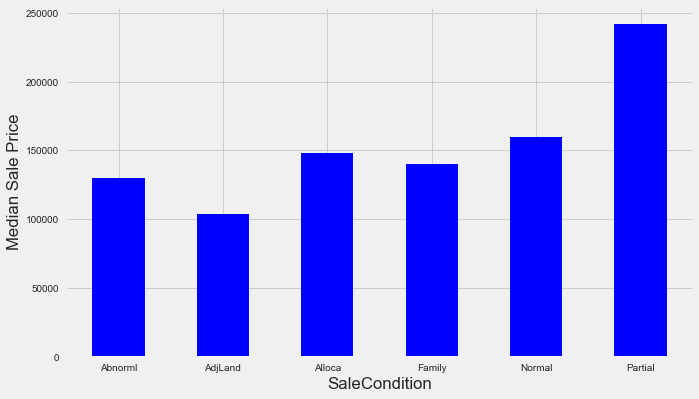

In [34]:
condition_pivot = train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
condition_pivot.plot(kind = 'bar',color = 'blue')
plt.xlabel('SaleCondition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)

In [38]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

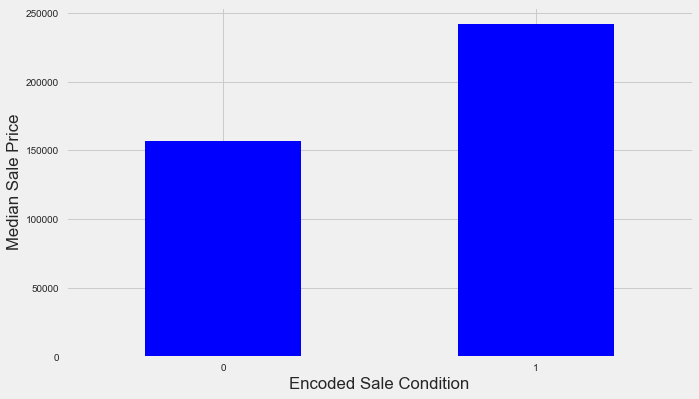

In [41]:
condition_pivot = train.pivot_table(index = 'enc_condition', values = 'SalePrice', aggfunc = np.median)
condition_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation = 0)

***Interpolation***

In [42]:
data = train.select_dtypes(include = [np.number]).interpolate().dropna()

In [46]:
sum(data.isnull().sum() != 0)

0

***Build Linear Model***

In [47]:
x = data.drop(['SalePrice', 'Id'], axis = 1)
y = np.log(train.SalePrice)

***Spliting into Tranining and Test and Apply Linear Regression Model***

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = .33)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

***Evaluating Performance and Visualizing Score***

***R2 Value***

In [52]:
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926


In [53]:
predictions = model.predict(X_test)

In [55]:
print("RMSE is: \n", mean_squared_error(y_test, predictions))

RMSE is: 
 0.0178417945196


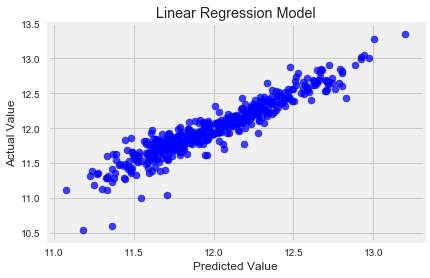

In [59]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha = 0.75,color = 'b' )
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Linear Regression Model')

***Improving Our Model with Ridge Regression***

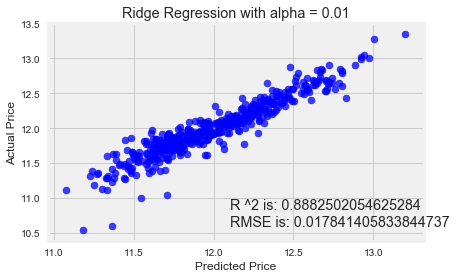

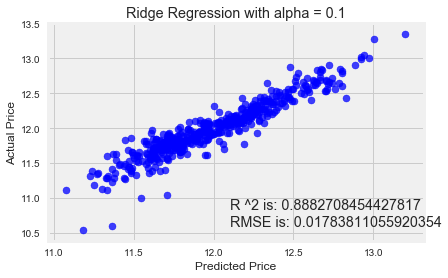

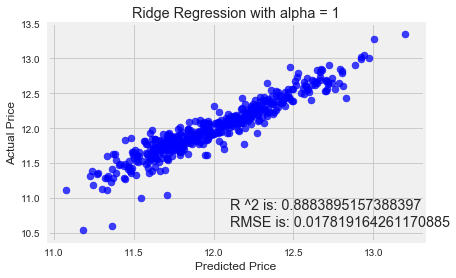

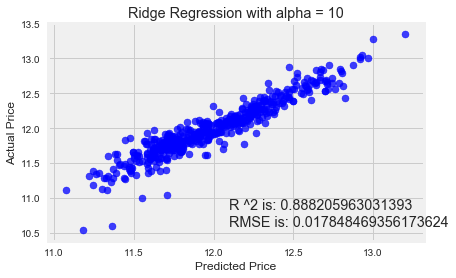

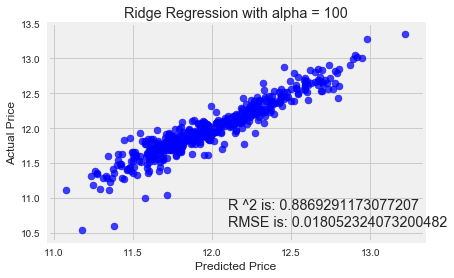

In [63]:
for i in range(-2,3):
    alpha = 10**i
    rm=linear_model.Ridge(alpha = alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, y_test, alpha = 0.75, color ='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regression with alpha = {}'.format(alpha))
    overlay = 'R ^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s = overlay, xy =(12.1, 10.6), size = 'x-large')
    plt.show()

***Making Submission***

In [67]:
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include = [np.number]).drop(['Id'], axis =1).interpolate()

In [68]:
predictions = model.predict(feats)
final_predictions = np.exp(predictions)
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.76725362  11.71929504  12.07656074  12.20632678  12.11217655] 

Final predictions are: 
 [ 128959.49172586  122920.74024356  175704.82598102  200050.83263755
  182075.46986405]


In [69]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [70]:
submission.to_csv('submission1.csv', index = False)